Download the cat_dog_images zip and put it in your Data folder if you haven't already.

Read in every file from the cat_dog_images directory. For every .png image in those directories:

Convert it to a monochrome image by averaging the RGB values for each pixel (use numpy to do this quickly!).
This isn't the most "eye-accurate" way of converting to monochrome, but it is the easiest!
Display the monochrome image.
Save the monochrome image into a matching directory in Data/monochrome - that is, if you've read in "Data/cat_dog_images/cat/cat1.png", you should save the monochrome version to "Data/monochrome_cat_dog_images/cat/cat1.png"
Make sure your script will create the monochrome_cat_dog_images directory if it does not exist
The image library won't let you save float values in a PNG image, so before you save the image you'll have to convert the values to uint8


Animal cat1.png is in cat
The animal image for cat1.png is size (200, 240)


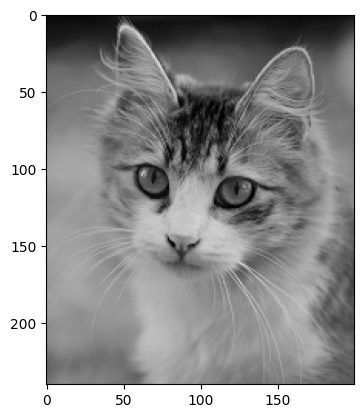

Animal cat2.png is in cat
The animal image for cat2.png is size (200, 150)


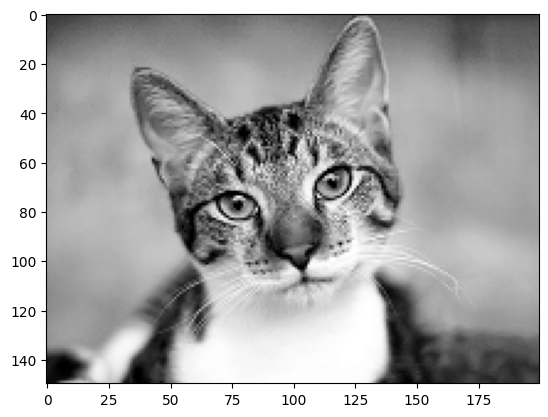

Animal dog1.png is in dog
The animal image for dog1.png is size (200, 200)


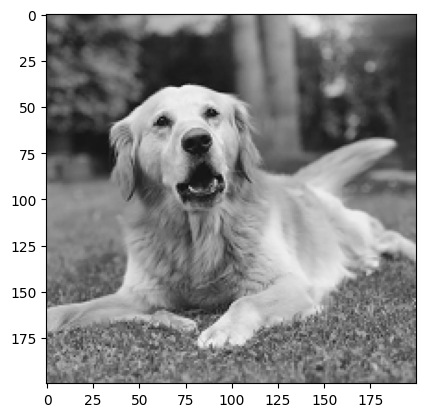

Animal dog2.png is in dog
The animal image for dog2.png is size (200, 200)


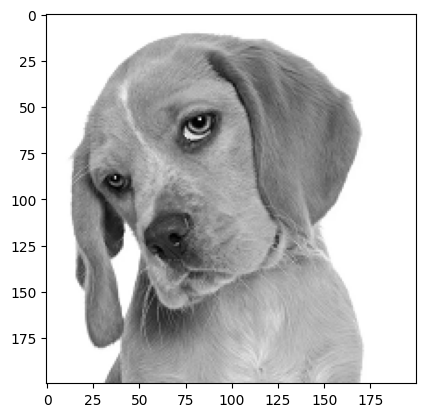

In [3]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a path to the directory we want to look at
cat_dog_dir = Path("./data/cat_dog_images/")

# Get a list of all the filenames of the animals we want
animal_files = list(cat_dog_dir.glob("./*/*.png"))

for animal_file in animal_files:
    animal_name = animal_file.name
    parent_directory = animal_file.parent.name
    print(f"Animal {animal_name} is in {parent_directory}")
    
    animal_image = Image.open(str(animal_file))
    print(f"The animal image for {animal_name} is size {animal_image.size}")
    
    animal_array = np.array(animal_image)
    bw_animal_array = np.average(animal_array, axis=2)
    bw_animal_img = Image.fromarray(bw_animal_array)
    
    # Show it
    plt.imshow(bw_animal_img)
    plt.show()

    new_animal_img = Image.fromarray(bw_animal_array.astype(np.uint8))
    Path(f"./data/monochrome/{parent_directory}").mkdir(exist_ok=True, parents=True)
    new_animal_file_path = Path(f"./data/monochrome/{parent_directory}/{animal_name}")
    new_animal_img.save(new_animal_file_path, "PNG")